In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
import string
from top2vec import Top2Vec

2022-07-09 13:41:29.438985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-09 13:41:29.439063: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [58]:
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("../csv/2019_crossref_pubmed_upw_openalex.csv", index_col = 0)
# Basic preprocessing
df.dropna(inplace = True)
df.shape

(21434, 16)

In [3]:
data = pd.DataFrame(df.abstract)

# No need for preprocessing for Top2Vec
data.head()

abstract
0  Neuromyelitis optica spectrum disorder (NMOSD)...
1  Erythromelalgia is a condition characterized b...
3  Mycosis fungoides (MF) represents the majority...
4  BACKGROUND: Malignant middle cerebral artery i...
5  Update of    Cochrane Database Syst Rev. 2015 ...

In [4]:
model = Top2Vec(data['abstract'].values, embedding_model='doc2vec')

2022-07-09 13:41:35,079 - top2vec - INFO - Pre-processing documents for training
2022-07-09 13:41:44,087 - top2vec - INFO - Creating joint document/word embedding
2022-07-09 13:49:17,123 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-09 13:49:41,474 - top2vec - INFO - Finding dense areas of documents
2022-07-09 13:49:43,210 - top2vec - INFO - Finding topics


In [5]:
model.get_num_topics()

253

In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()

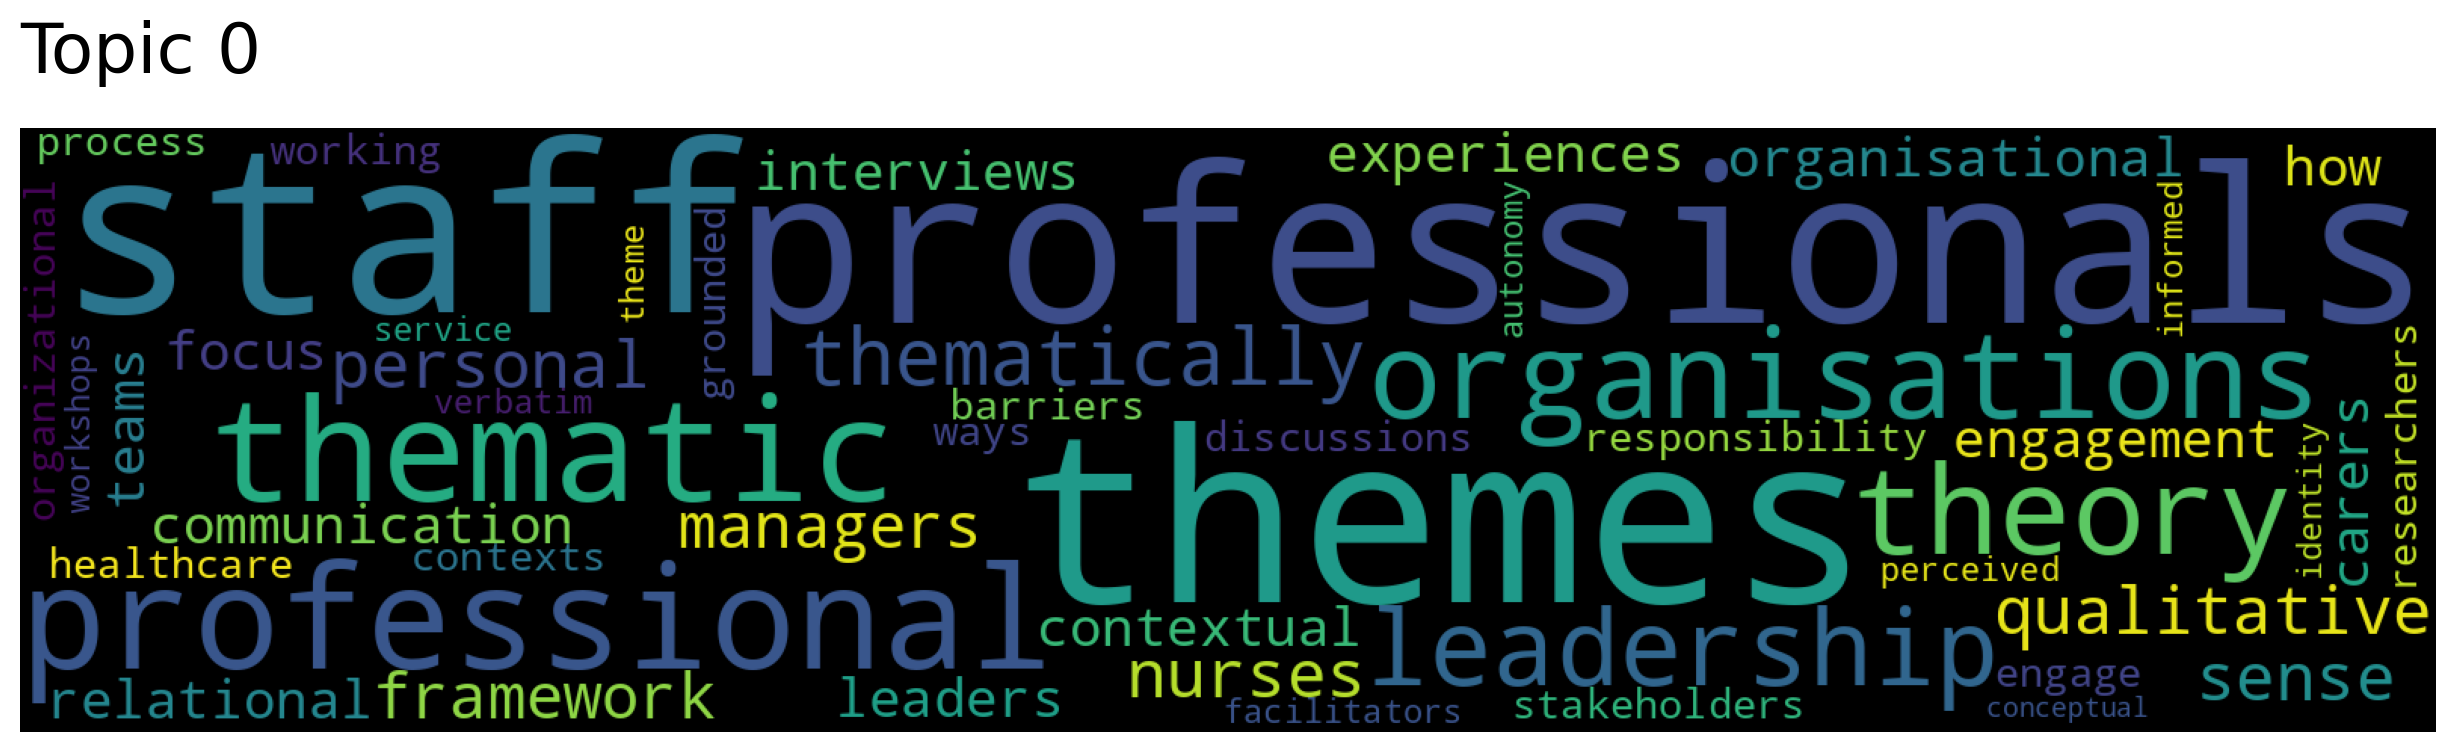

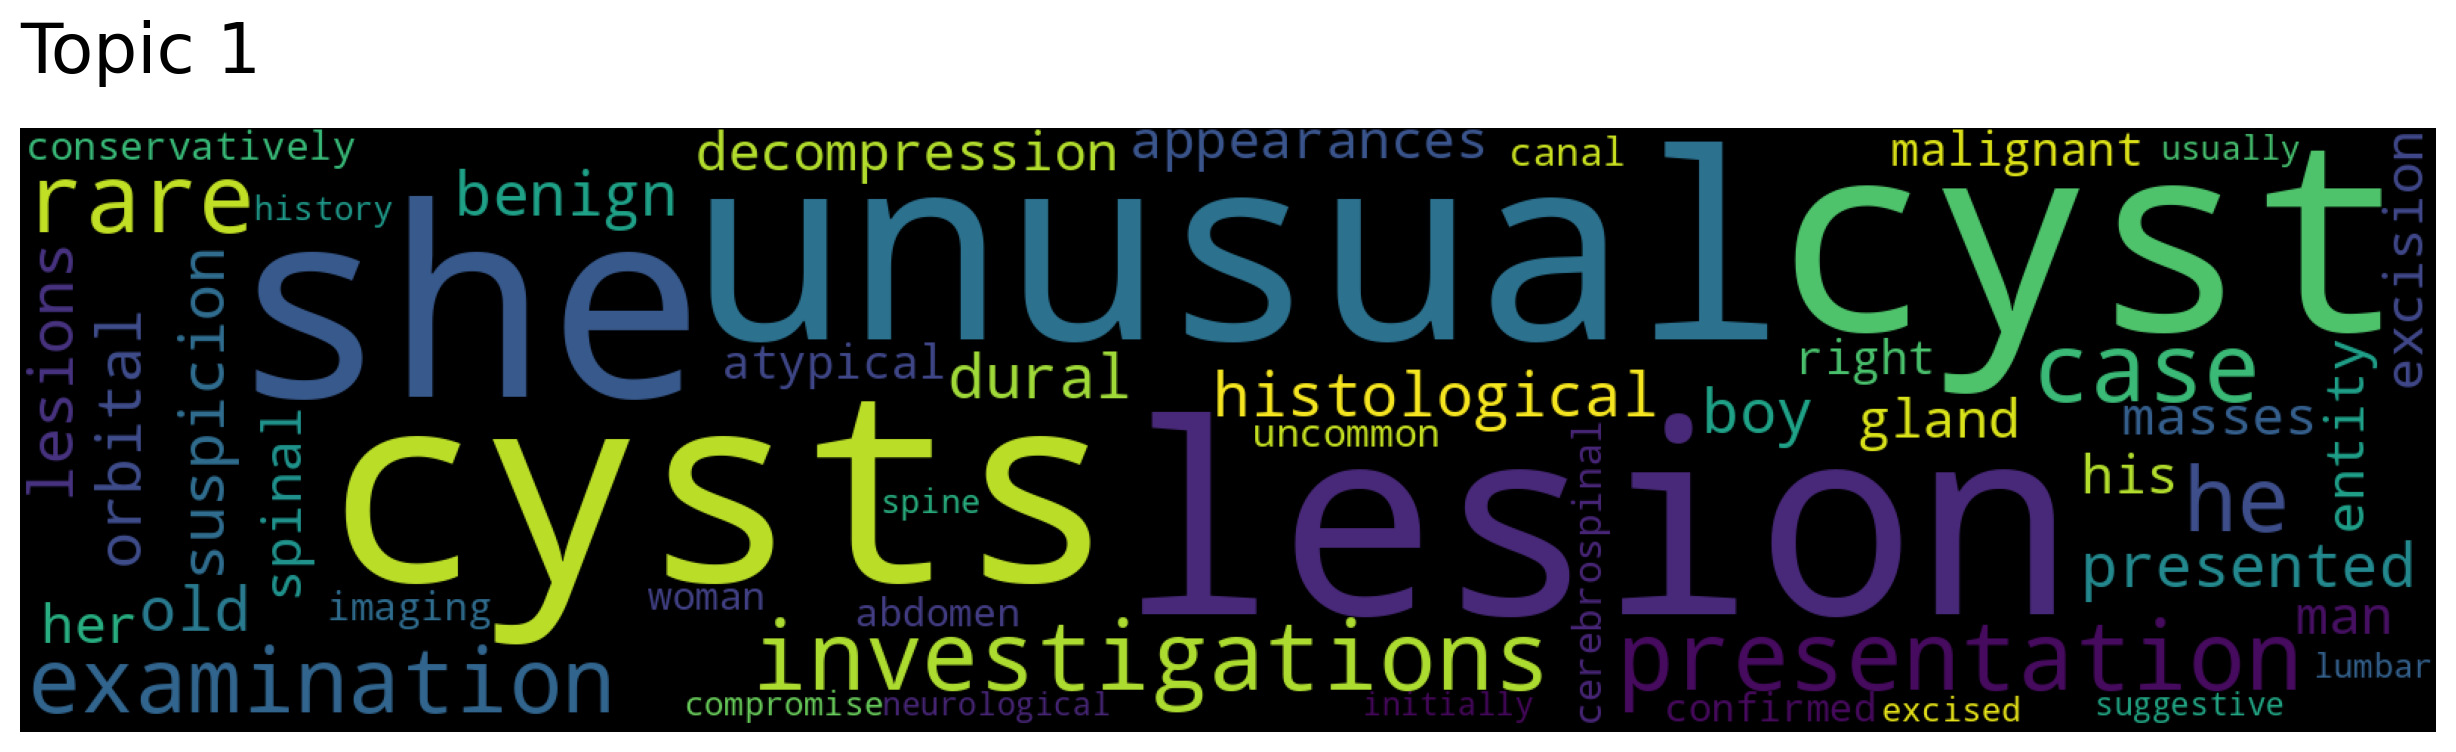

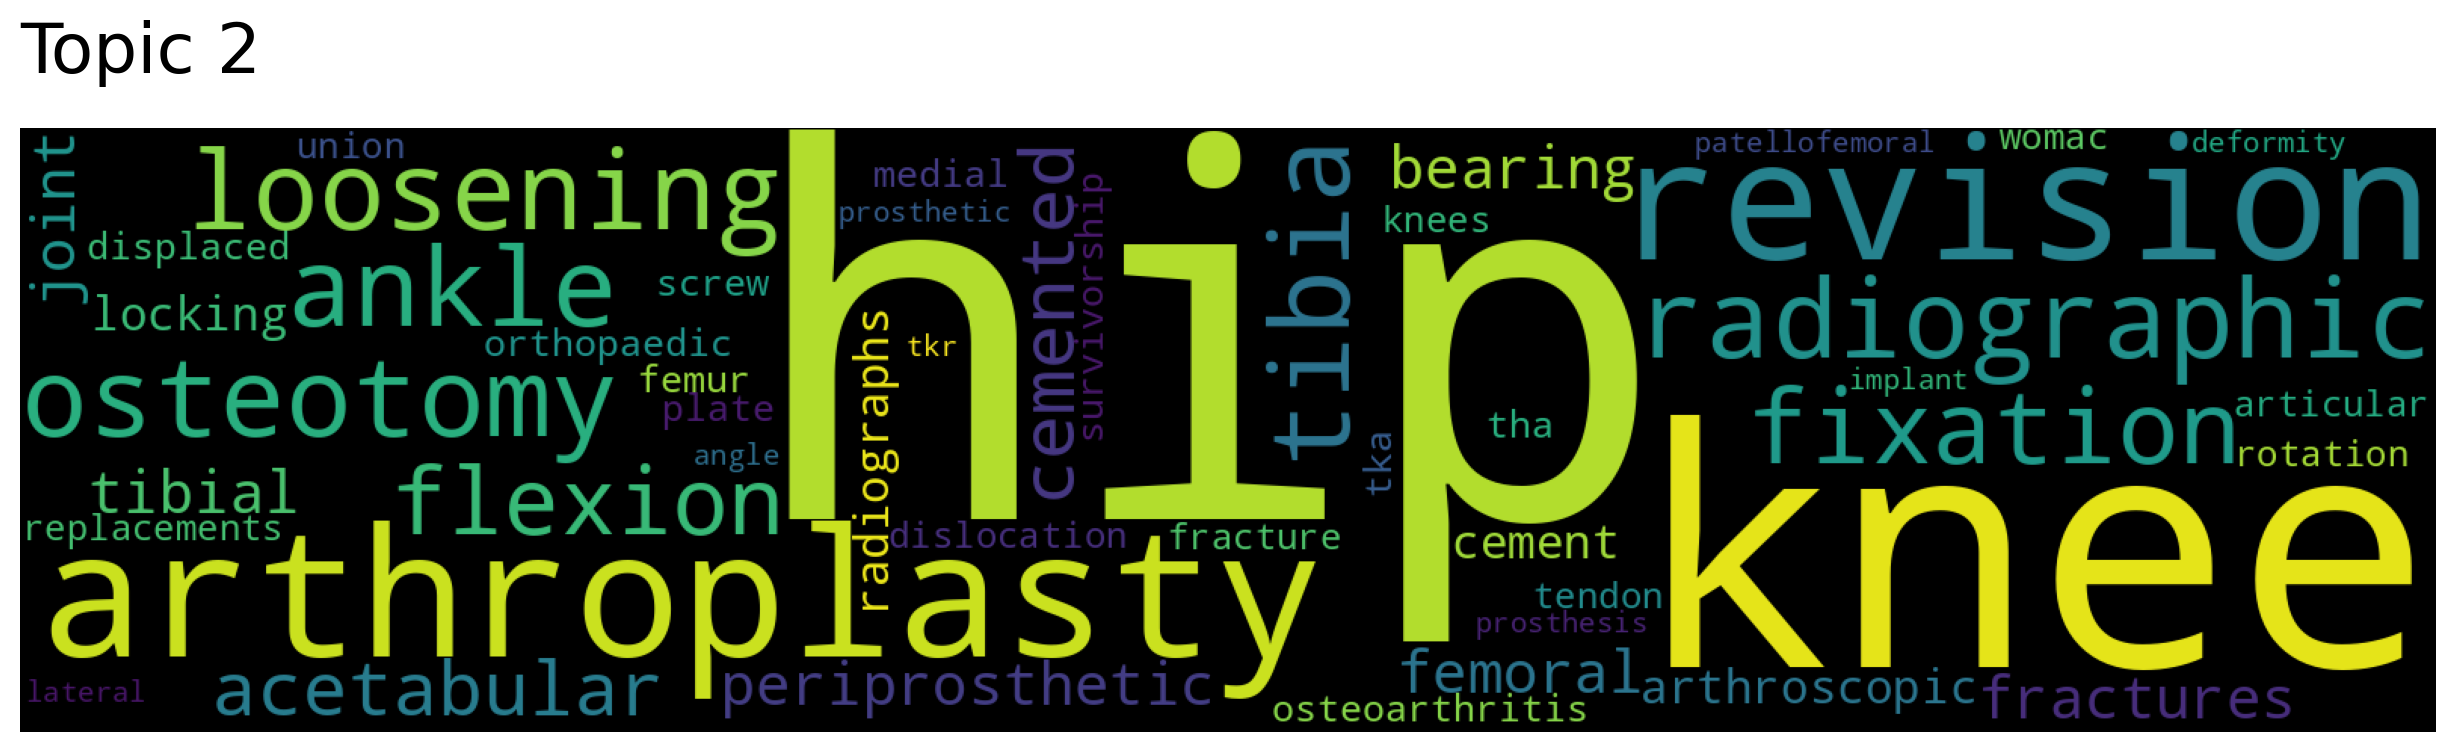

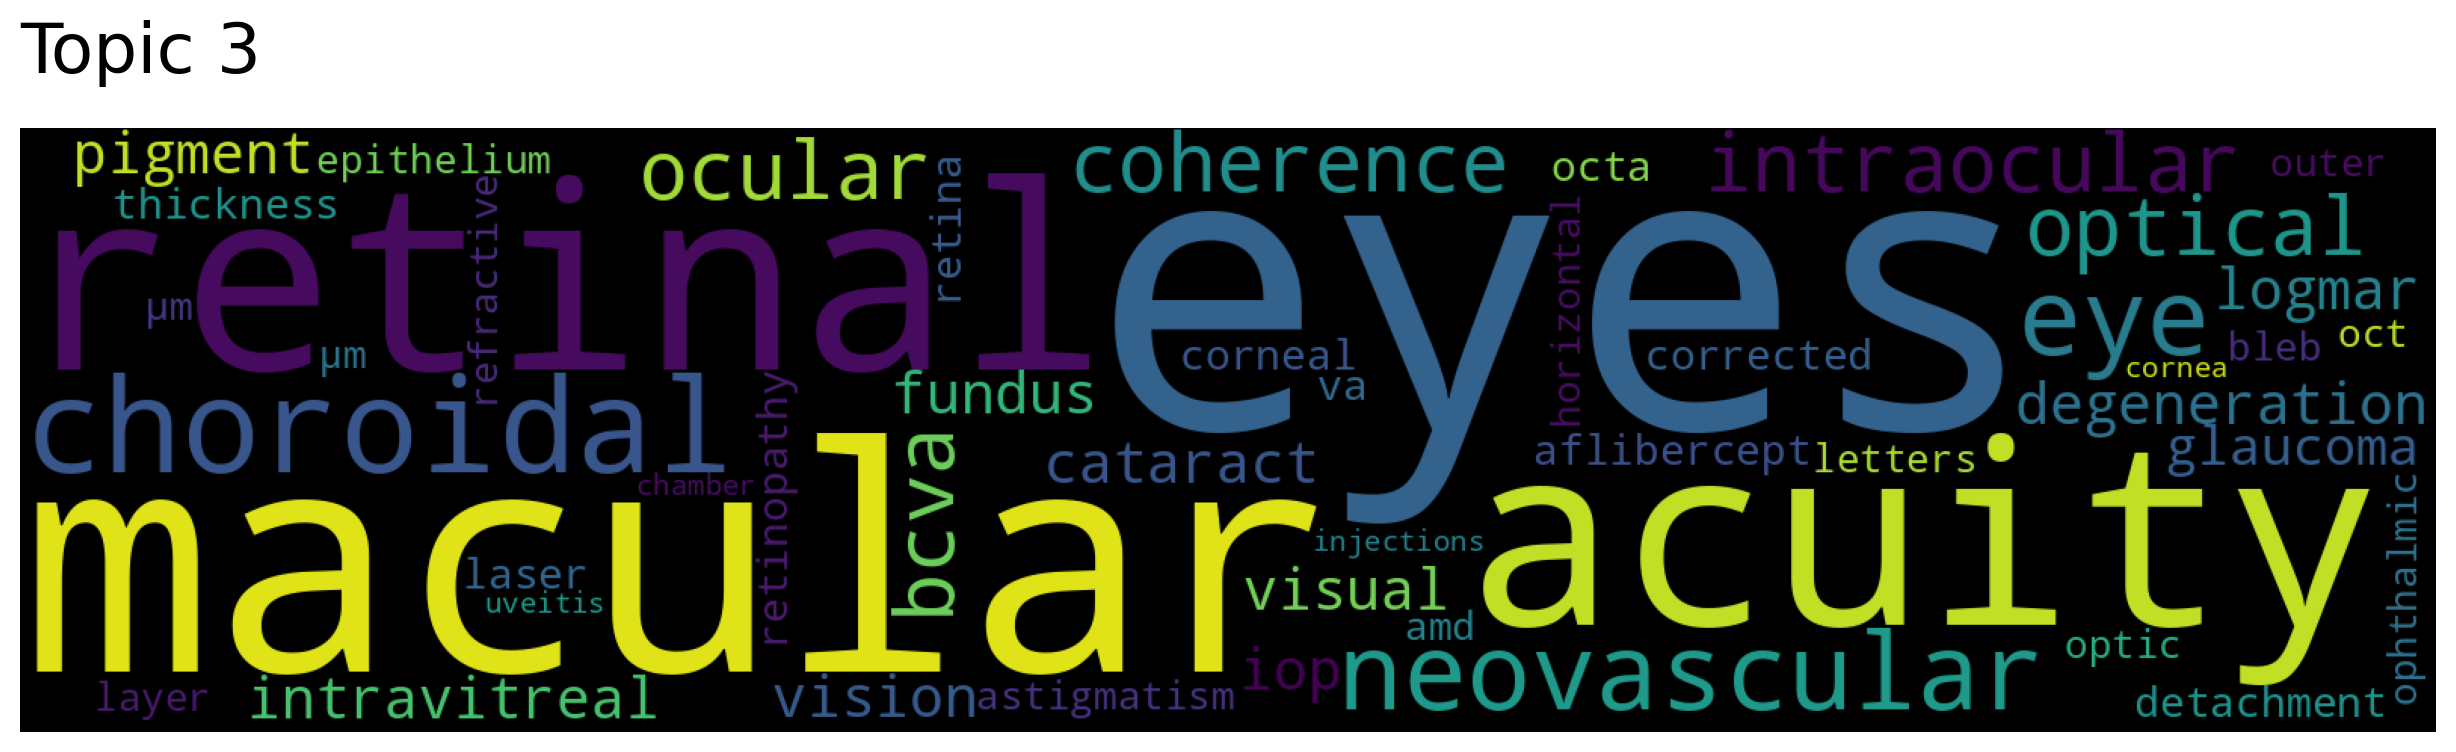

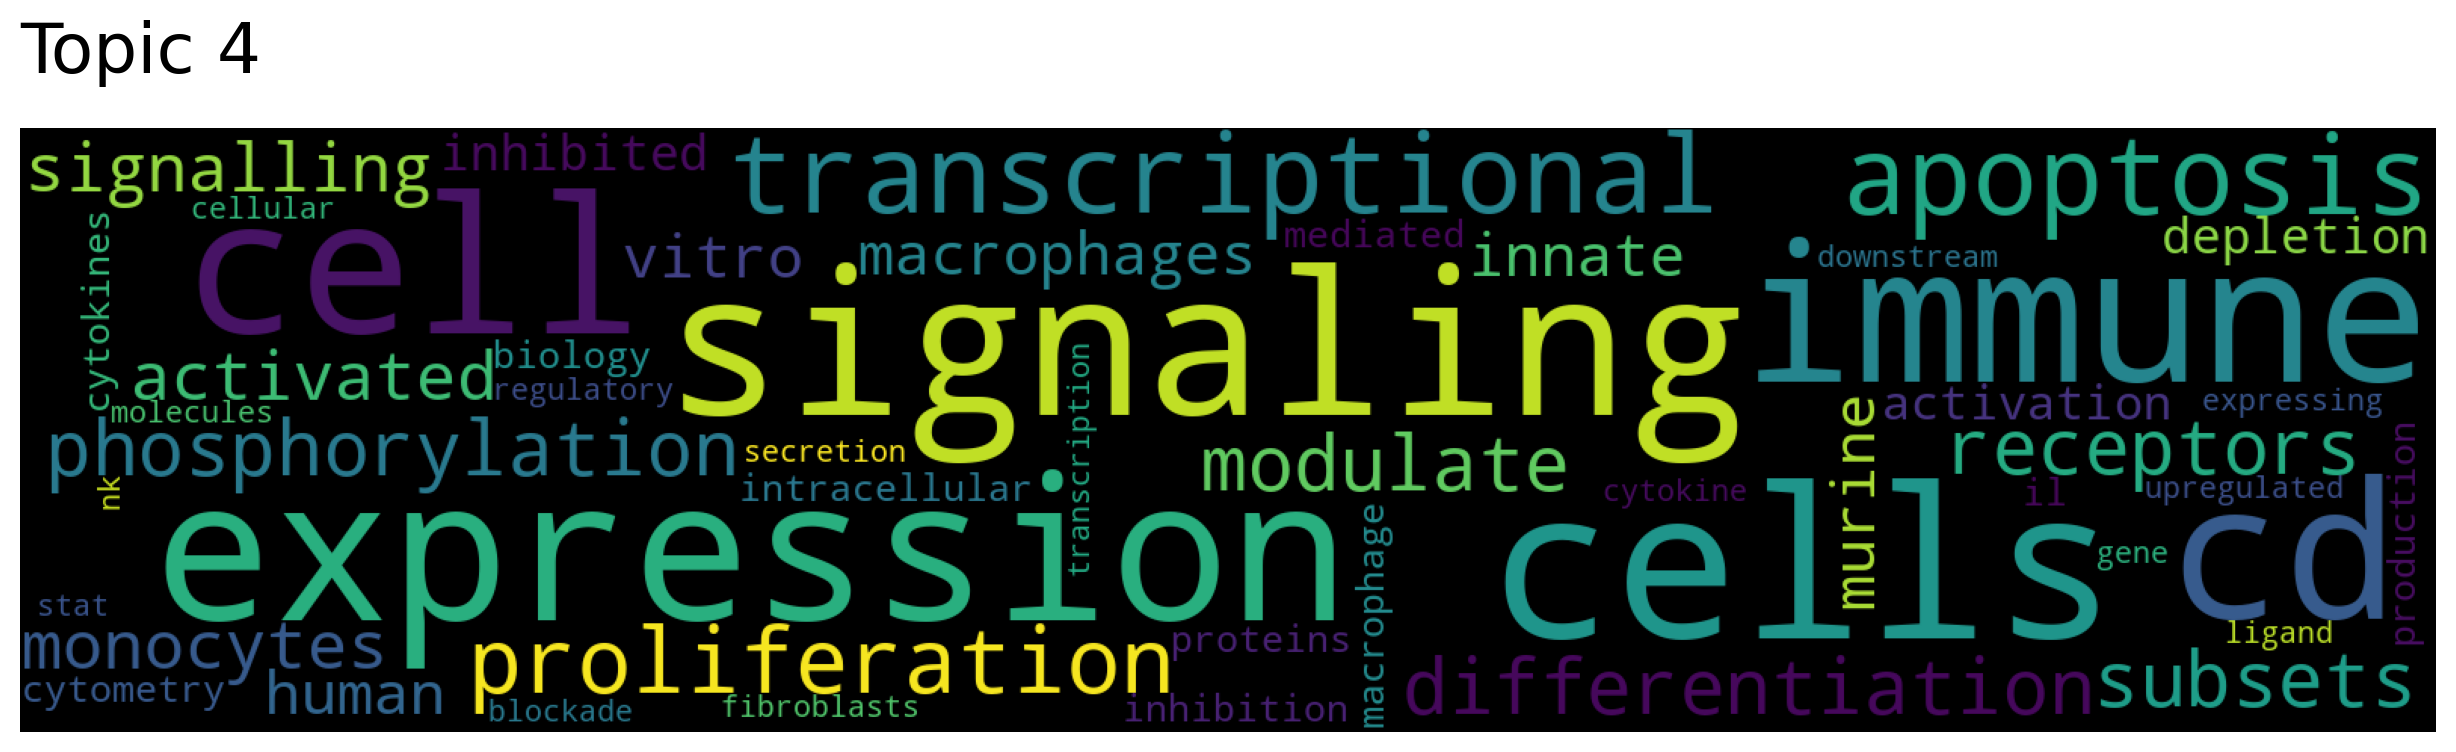

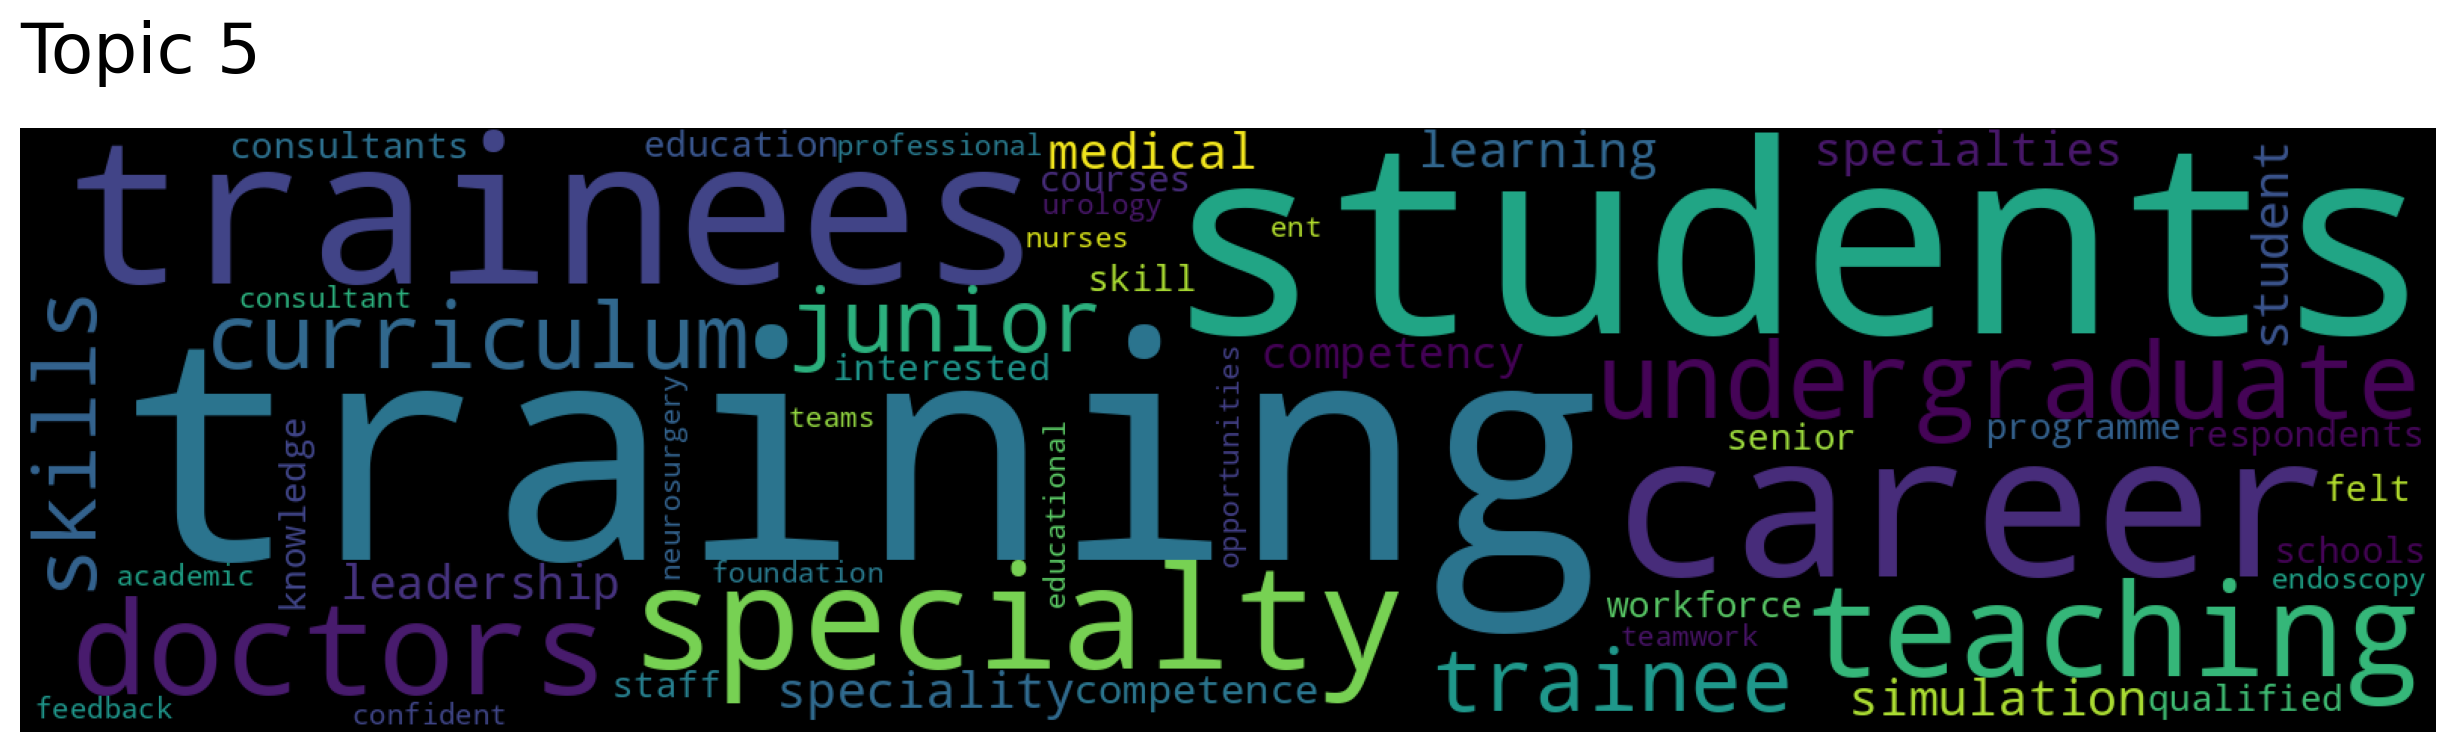

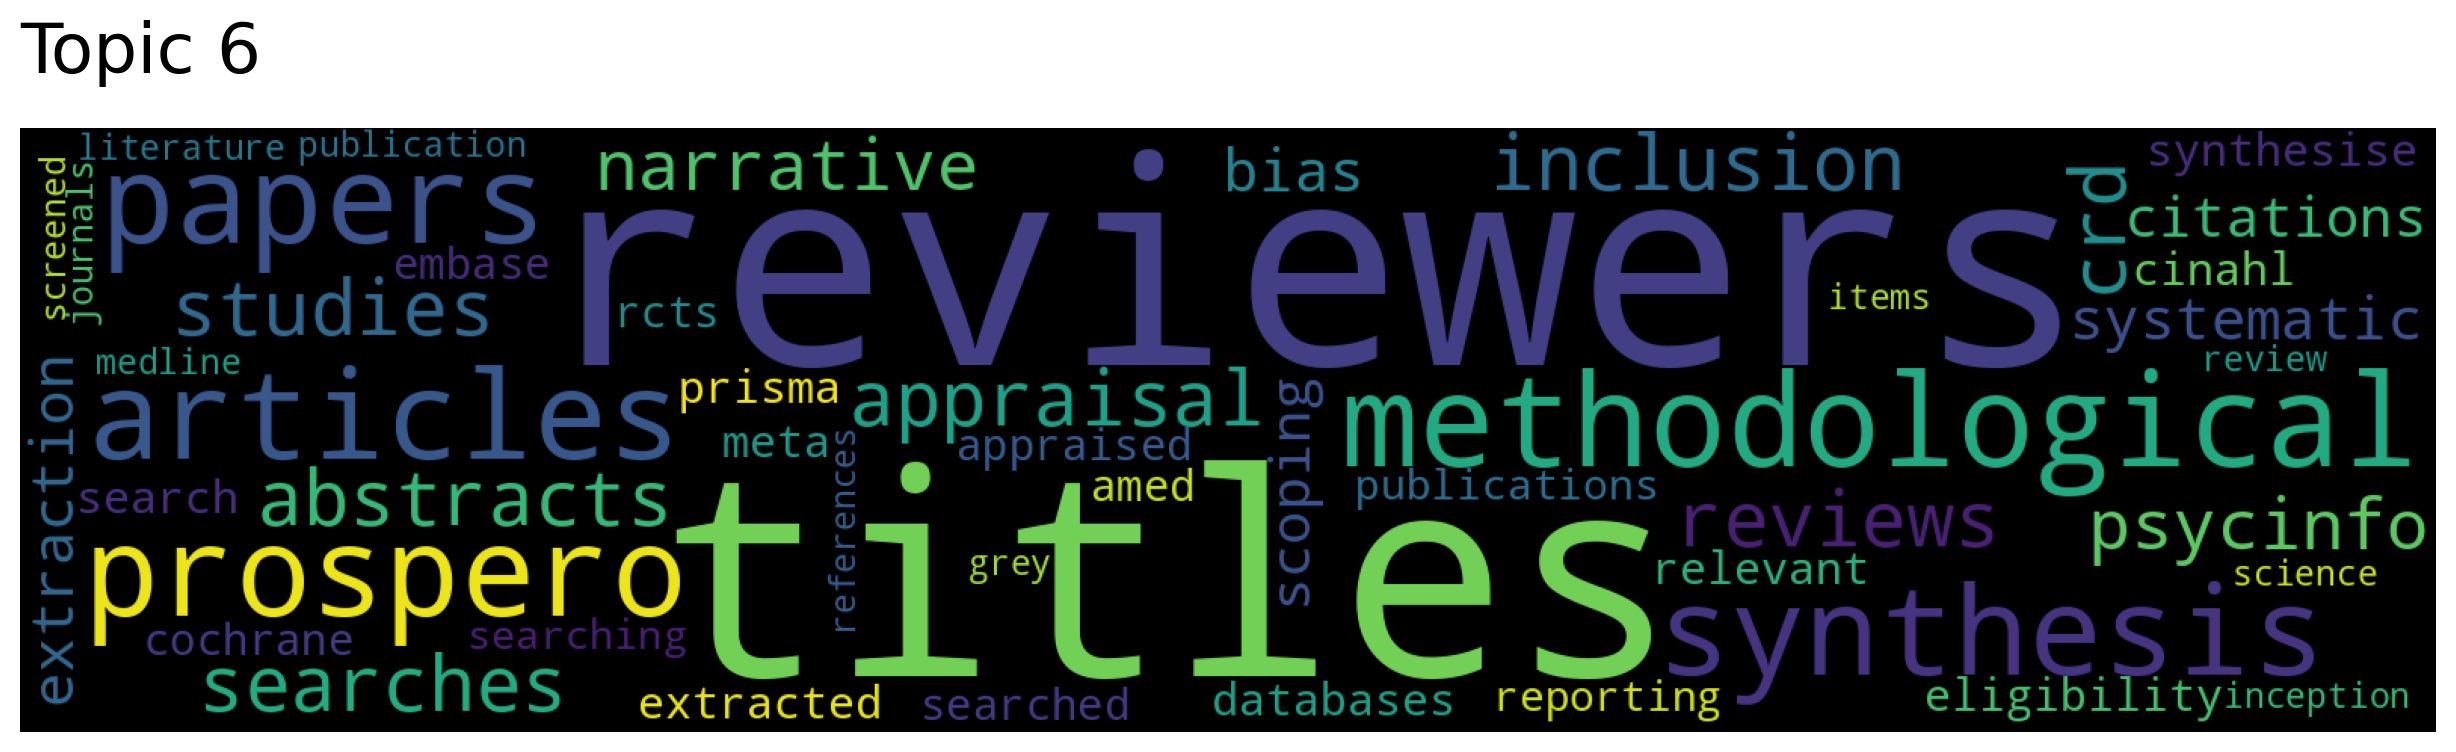

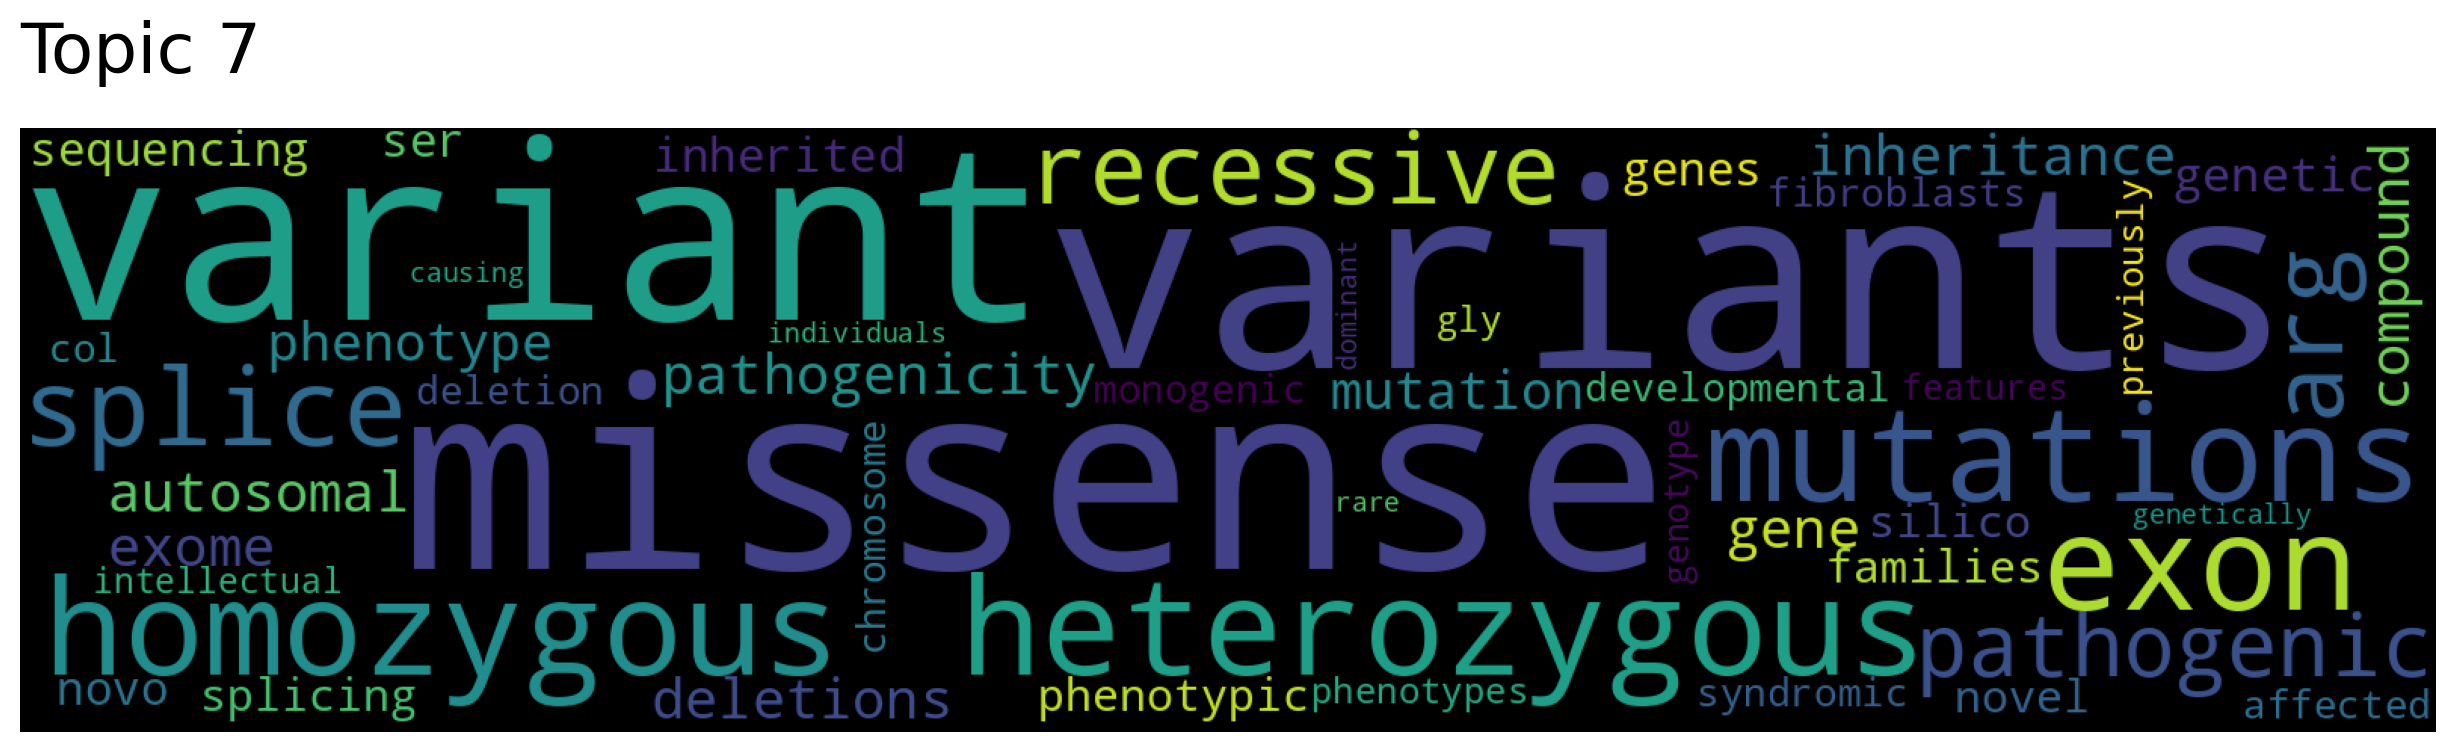

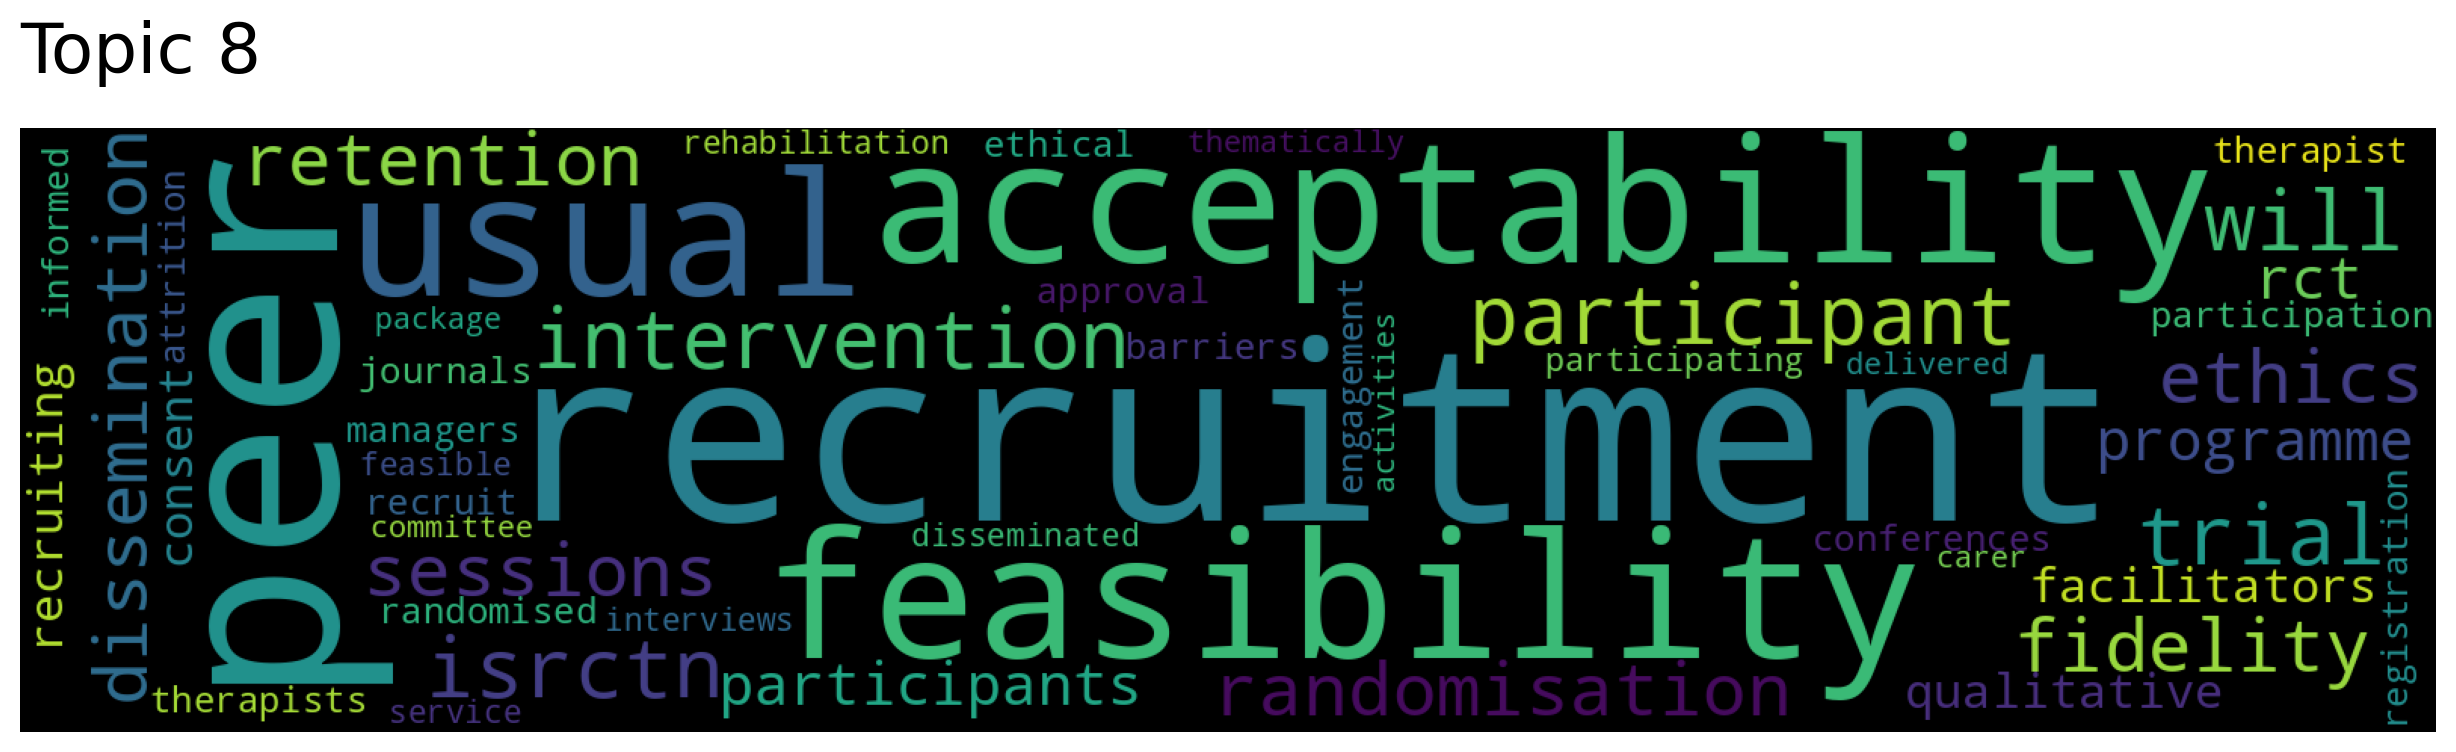

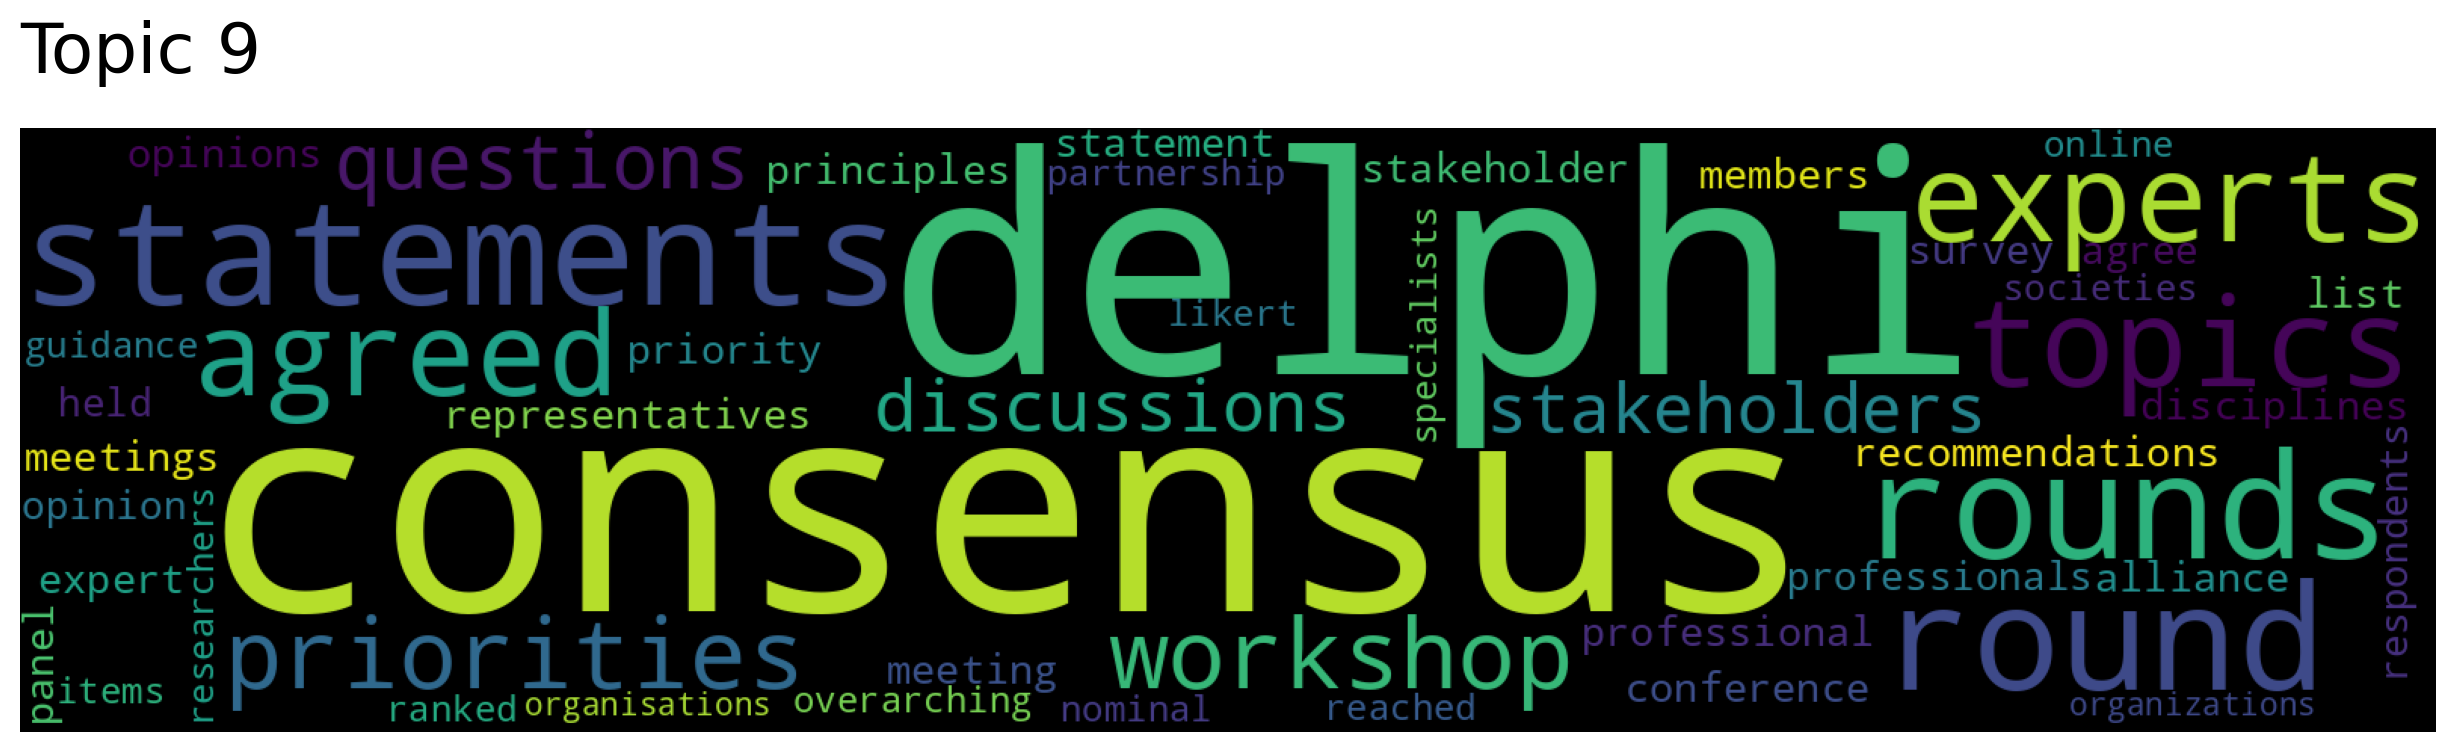

In [7]:
for i in range(10): 
    model.generate_topic_wordcloud(i)

In [8]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cancer"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 6523, Score: 0.37499693036079407
-----------
Breast cancer in men is rare and only about 390 men in the UK are diagnosed with breast cancer each year with an incidence rate in the UK of 1.5 cases per 100 000 men. In addition, the increased use of radiotherapy for management of breast cancer has led to a reported increase of radiation induced angiosarcomas (RIAS) with an incidence of 0.05-0.3%. Here we report a unique and extremely rare case of RIAS of breast in a male patient. To our knowledge this is the only case in the literature of a radiation induced angiosarcoma of the breast in a male.
-----------

Document: 11397, Score: 0.36097344756126404
-----------
BACKGROUND: BRCA1/2 mutations confer high lifetime risk of breast cancer, although other factors may modify this risk. Whether height or body mass index (BMI) modifies breast cancer risk in BRCA1/2 mutation carriers remains unclear.METHODS: We used Mendelian randomization approaches to evaluate the association of height

In [9]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["antibiotic"], num_topics=5)
topic_nums

array([ 88, 173,  10, 236,  96])

In [10]:
topic_words

[array(['stewardship', 'antimicrobial', 'ams', 'antibiotic', 'antibiotics',
        'prescribing', 'microbiology', 'amr', 'ipc', 'prescribers',
        'nurses', 'nurse', 'organisational', 'threat', 'undergraduate',
        'pharmacists', 'infections', 'nursing', 'sector', 'staff',
        'prescriptions', 'organisations', 'microbiological', 'pharmacy',
        'pharmaceutical', 'antifungal', 'inappropriate', 'leaders',
        'competency', 'broad', 'implementing', 'organisms', 'penicillin',
        'empirical', 'resistance', 'community', 'programmes', 'prescribed',
        'healthcare', 'escalation', 'colleagues', 'organizations', 'utis',
        'sustainable', 'commissioning', 'qualified', 'hospitals',
        'strategic', 'medicines', 'education'], dtype='<U15'),
 array(['uti', 'utis', 'coli', 'antibiotic', 'urinary', 'amoxicillin',
        'tract', 'infections', 'antibiotics', 'bsi', 'urine',
        'microbiology', 'antimicrobial', 'inappropriate', 'isolates',
        'mdr', 'opa

In [11]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)


In [12]:
for i in range(20):
    print(model.topic_words_reduced[i])

['comment' 'jul' 'feb' 'transl' 'bjog' 'urol' 'aug' 'nov' 'erratum' 'jun'
 'jan' 'oncol' 'dec' 'dermatol' 'mar' 'lancet' 'genet' 'hepatol'
 'cardiovasc' 'cardiol' 'radiol' 'hosp' 'surg' 'respir' 'clin' 'thorac'
 'eur' 'ther' 'anaesth' 'apr' 'pract' 'gastroenterol' 'endovasc' 'crit'
 'engl' 'pediatr' 'sep' 'bmj' 'rheumatol' 'lond' 'biol' 'obstet' 'ann'
 'int' 'jacc' 'neurol' 'anesth' 'plast' 'med' 'br']
['staff' 'professionals' 'professional' 'themes' 'nurses' 'training'
 'communication' 'organisations' 'teams' 'engagement' 'personal'
 'healthcare' 'managers' 'leadership' 'barriers' 'discussions' 'thematic'
 'stakeholders' 'organisational' 'thematically' 'working' 'qualitative'
 'service' 'feedback' 'practitioners' 'carers' 'engage' 'framework'
 'workshops' 'career' 'students' 'how' 'focus' 'workforce' 'felt'
 'facilitators' 'process' 'organizational' 'leaders' 'perceived'
 'responsibility' 'issues' 'doctors' 'informed' 'researchers' 'attitudes'
 'interviews' 'theory' 'valued' 'pharmacy

In [13]:
df['is_oa'].value_counts()

True     15364
False     6070
Name: is_oa, dtype: int64

## OA papers only

In [14]:
df_oa = pd.DataFrame(df[df['is_oa'] == True].abstract)
df_oa.head()

abstract
0  Neuromyelitis optica spectrum disorder (NMOSD)...
1  Erythromelalgia is a condition characterized b...
4  BACKGROUND: Malignant middle cerebral artery i...
6  The adverse consequences of stable coronary ar...
7       Update of    doi: 10.1002/14651858.CD011847.

In [15]:
model2 = Top2Vec(df_oa['abstract'].values, embedding_model='doc2vec')

2022-07-09 13:52:01,902 - top2vec - INFO - Pre-processing documents for training
2022-07-09 13:52:07,737 - top2vec - INFO - Creating joint document/word embedding
2022-07-09 13:57:20,829 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-09 13:57:29,134 - top2vec - INFO - Finding dense areas of documents
2022-07-09 13:57:29,701 - top2vec - INFO - Finding topics


In [16]:
topic_mapping = model2.hierarchical_topic_reduction(num_topics=20)


In [17]:
for i in range(20):
    print(model2.topic_words_reduced[i])

['jul' 'feb' 'comment' 'aug' 'oncol' 'radiol' 'erratum' 'transl' 'jun'
 'cardiol' 'urol' 'mar' 'dec' 'pediatr' 'dermatol' 'respir' 'clin' 'bmj'
 'jan' 'hepatol' 'nov' 'engl' 'surg' 'thorac' 'cardiovasc' 'lancet' 'crit'
 'lond' 'int' 'eur' 'neurol' 'ann' 'sep' 'med' 'br' 'apr' 'dis' 'infect'
 'reconstr' 'rev' 'am' 'nat' 'psychiatry' 'oct' 'res' 'vasc' 'may' 'doi'
 'null' 'soc']
['professional' 'professionals' 'themes' 'staff' 'nurses' 'workforce'
 'discussions' 'training' 'thematic' 'communication' 'healthcare'
 'managers' 'service' 'teams' 'practitioners' 'leadership' 'felt' 'career'
 'students' 'qualitative' 'stakeholders' 'valued' 'perceived' 'workshops'
 'team' 'undergraduate' 'carers' 'barriers' 'engagement' 'interviews'
 'practice' 'provision' 'doctors' 'organisations' 'organisational'
 'nursing' 'researchers' 'experiences' 'feel' 'competence' 'building'
 'informed' 'needs' 'overarching' 'personal' 'views' 'skills' 'working'
 'how' 'qualified']
['images' 'segmentation' 'phantom' '

## Closed access papers only

In [55]:
df_not_oa = pd.DataFrame(df[df['is_oa'] == False].abstract)
df_not_oa.head()

abstract
3   Mycosis fungoides (MF) represents the majority...
5   Update of    Cochrane Database Syst Rev. 2015 ...
14  Comment in    J R Coll Physicians Edinb. 2019 ...
29  Biliary tract cancers (BTCs) are poor prognosi...
30  BACKGROUND: The incidence of pancreatic Neuroe...

In [56]:
model3 = Top2Vec(df_oa['abstract'].values, embedding_model='doc2vec')

2022-07-09 14:25:33,611 - top2vec - INFO - Pre-processing documents for training
2022-07-09 14:25:39,680 - top2vec - INFO - Creating joint document/word embedding
2022-07-09 14:30:25,731 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-09 14:30:33,722 - top2vec - INFO - Finding dense areas of documents
2022-07-09 14:30:34,247 - top2vec - INFO - Finding topics


In [57]:
topic_mapping = model3.hierarchical_topic_reduction(num_topics=20)


## Comparing topics across diff publication availability

In [18]:
df_oa.shape

(15364, 1)

In [19]:
data.shape

(21434, 1)

In [27]:
model.topic_words_reduced

array([['comment', 'jul', 'feb', 'transl', 'bjog', 'urol', 'aug', 'nov',
        'erratum', 'jun', 'jan', 'oncol', 'dec', 'dermatol', 'mar',
        'lancet', 'genet', 'hepatol', 'cardiovasc', 'cardiol', 'radiol',
        'hosp', 'surg', 'respir', 'clin', 'thorac', 'eur', 'ther',
        'anaesth', 'apr', 'pract', 'gastroenterol', 'endovasc', 'crit',
        'engl', 'pediatr', 'sep', 'bmj', 'rheumatol', 'lond', 'biol',
        'obstet', 'ann', 'int', 'jacc', 'neurol', 'anesth', 'plast',
        'med', 'br'],
       ['staff', 'professionals', 'professional', 'themes', 'nurses',
        'training', 'communication', 'organisations', 'teams',
        'engagement', 'personal', 'healthcare', 'managers', 'leadership',
        'barriers', 'discussions', 'thematic', 'stakeholders',
        'organisational', 'thematically', 'working', 'qualitative',
        'service', 'feedback', 'practitioners', 'carers', 'engage',
        'framework', 'workshops', 'career', 'students', 'how', 'focus',
        

In [52]:
topics_df = pd.DataFrame(np.arange(0,20,1))
topics_df['all_papers_topics'] = 0
topics_df.drop(columns = [0], inplace = True)

In [53]:
for i in range(len(model.topic_words_reduced)):
    topics_df['all_papers_topics'].iloc[i] = model.topic_words_reduced[i]
topics_df.head()

all_papers_topics
0  [comment, jul, feb, transl, bjog, urol, aug, n...
1  [staff, professionals, professional, themes, n...
2  [depression, mental, anxiety, psychological, s...
3  [comment, jul, feb, bjog, nov, transl, aug, er...
4  [images, eyes, optical, phantom, segmentation,...

In [54]:
topics_df['oa_papers_topics'] = 0
for i in range(len(model2.topic_words_reduced)):
    topics_df['oa_papers_topics'].iloc[i] = model2.topic_words_reduced[i]
topics_df.head()

/tmp/ipykernel_10315/169880148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df['oa_papers_topics'].iloc[i] = model2.topic_words_reduced[i]


all_papers_topics  \
0  [comment, jul, feb, transl, bjog, urol, aug, n...   
1  [staff, professionals, professional, themes, n...   
2  [depression, mental, anxiety, psychological, s...   
3  [comment, jul, feb, bjog, nov, transl, aug, er...   
4  [images, eyes, optical, phantom, segmentation,...   

                                    oa_papers_topics  
0  [jul, feb, comment, aug, oncol, radiol, erratu...  
1  [professional, professionals, themes, staff, n...  
2  [images, segmentation, phantom, scans, optical...  
3  [neonatal, corticosteroids, exacerbations, exa...  
4  [mental, depression, emotional, anxiety, psych...

In [59]:
topics_df['closed_papers_topics'] = 0
for i in range(len(model3.topic_words_reduced)):
    topics_df['closed_papers_topics'].iloc[i] = model3.topic_words_reduced[i]
topics_df.head()

/tmp/ipykernel_10315/1109719637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df['closed_papers_topics'].iloc[i] = model3.topic_words_reduced[i]


all_papers_topics  \
0                                                                                                                                                                                                [comment, jul, feb, transl, bjog, urol, aug, nov, erratum, jun, jan, oncol, dec, dermatol, mar, lancet, genet, hepatol, cardiovasc, cardiol, radiol, hosp, surg, respir, clin, thorac, eur, ther, anaesth, apr, pract, gastroenterol, endovasc, crit, engl, pediatr, sep, bmj, rheumatol, lond, biol, obstet, ann, int, jacc, neurol, anesth, plast, med, br]   
1    [staff, professionals, professional, themes, nurses, training, communication, organisations, teams, engagement, personal, healthcare, managers, leadership, barriers, discussions, thematic, stakeholders, organisational, thematically, working, qualitative, service, feedback, practitioners, carers, engage, framework, workshops, career, students, how, focus, workforce, felt, facilitators, process, organizational, leaders, perceived, responsibility, issues, doctors, informed, researchers, attitudes, interviews, theory, valued, pharmacy]   
2  [depression, mental, anxiety, psychological, self, adolescents, affective, social, psychosis, suicidal, paranoia, emotional, ideation, beliefs, sample, behavioural, suicide, mood, depressive, eating, ptsd, psychotic, metacognitive, psychopathology, psychiatric, cbt, wellbeing, transdiagnostic, disorder, metacognitions, feelings, functioning, loneliness, adolescent, youth, binge, cognitive, delusions, experiences, alexithymia, compassion, interpersonal, emotions, cptsd, behaviour, physical, distress, behaviours, illness, psychometric]   
3                                                                                                                                                                                             [comment, jul, feb, bjog, nov, transl, aug, erratum, urol, jun, jan, oncol, dec, cardiol, mar, clin, radiol, hosp, ther, dermatol, lancet, genet, biol, thorac, int, lond, hepatol, respir, apr, obstet, cardiovasc, surg, pract, eur, pediatr, sep, crit, engl, endovasc, anesth, anaesth, gastroenterol, ann, bmj, coll, pharmacol, rheumatol, dis, jacc, med]   
4                                                                                               [images, eyes, optical, phantom, segmentation, image, macular, interobserver, retinal, scans, acuity, motion, astigmatism, contour, measurements, neovascular, bland, octa, repeatability, choroidal, altman, intraclass, automatic, cbct, error, eye, coherence, agreement, maps, iop, software, µm, calibration, beam, mm, reproducible, icc, fundus, adc, imaged, slice, observers, parameter, coefficients, zone, field, μm, algorithm, logmar, thickness]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         oa_papers_topics  \
0                                                                                                                                                                                                                     [jul, feb, comment, aug, oncol, radiol, erratum, transl, jun, cardiol, urol, mar, dec, pediatr, dermatol, respir, clin, bmj, jan, hepatol, nov, engl, surg, thorac, cardiovasc, lancet, crit, lond, int, eur, neurol, ann, sep, med, br, apr, dis, infect, reconstr, rev, am, nat, psychiatry, oct, res, vasc, may, doi, null, soc]   
1            [professional, professionals, themes, staff, nurses, workforce, discussions, training, thematic, communication, healthcare, managers, service, teams, pra

In [61]:
topics_df

all_papers_topics  \
0                                                                                                                                                                                                                       [comment, jul, feb, transl, bjog, urol, aug, nov, erratum, jun, jan, oncol, dec, dermatol, mar, lancet, genet, hepatol, cardiovasc, cardiol, radiol, hosp, surg, respir, clin, thorac, eur, ther, anaesth, apr, pract, gastroenterol, endovasc, crit, engl, pediatr, sep, bmj, rheumatol, lond, biol, obstet, ann, int, jacc, neurol, anesth, plast, med, br]   
1                           [staff, professionals, professional, themes, nurses, training, communication, organisations, teams, engagement, personal, healthcare, managers, leadership, barriers, discussions, thematic, stakeholders, organisational, thematically, working, qualitative, service, feedback, practitioners, carers, engage, framework, workshops, career, students, how, focus, workforce, felt, facilitators, process, organizational, leaders, perceived, responsibility, issues, doctors, informed, researchers, attitudes, interviews, theory, valued, pharmacy]   
2                         [depression, mental, anxiety, psychological, self, adolescents, affective, social, psychosis, suicidal, paranoia, emotional, ideation, beliefs, sample, behavioural, suicide, mood, depressive, eating, ptsd, psychotic, metacognitive, psychopathology, psychiatric, cbt, wellbeing, transdiagnostic, disorder, metacognitions, feelings, functioning, loneliness, adolescent, youth, binge, cognitive, delusions, experiences, alexithymia, compassion, interpersonal, emotions, cptsd, behaviour, physical, distress, behaviours, illness, psychometric]   
3                                                                                                                                                                                                                    [comment, jul, feb, bjog, nov, transl, aug, erratum, urol, jun, jan, oncol, dec, cardiol, mar, clin, radiol, hosp, ther, dermatol, lancet, genet, biol, thorac, int, lond, hepatol, respir, apr, obstet, cardiovasc, surg, pract, eur, pediatr, sep, crit, engl, endovasc, anesth, anaesth, gastroenterol, ann, bmj, coll, pharmacol, rheumatol, dis, jacc, med]   
4                                                                                                                      [images, eyes, optical, phantom, segmentation, image, macular, interobserver, retinal, scans, acuity, motion, astigmatism, contour, measurements, neovascular, bland, octa, repeatability, choroidal, altman, intraclass, automatic, cbct, error, eye, coherence, agreement, maps, iop, software, µm, calibration, beam, mm, reproducible, icc, fundus, adc, imaged, slice, observers, parameter, coefficients, zone, field, μm, algorithm, logmar, thickness]   
5                                                                                        [investigations, she, unusual, lesion, presentation, cyst, rare, case, orbital, cysts, he, boy, histological, examination, old, presented, suspicion, her, his, man, atypical, appearances, entity, lesions, uncommon, history, usually, benign, abdomen, decompression, imaging, diagnosis, conservatively, woman, right, masses, neurological, present, excision, dural, malignant, presenting, features, gland, compromise, confirmed, initially, entities, investigation, cerebrospinal]   
6                                                          [metastatic, chemotherapy, metastases, radiotherapy, tumour, survival, neoadjuvant, os, nsclc, adjuvant, pfs, capecitabine, metastasis, nodal, advanced, carcinoma, tumours, cancer, node, distant, lymph, progression, toxicity, curative, platinum, nodes, carboplatin, squamous, neuroendocrine, melanoma, cancers, nivolumab, pazopanib, toxicities, sarcomas, immunotherapy, tumors, resection, cystectomy, tumor, adenocarcinoma, stage, suvmax, psma, stereotactic, radical, staging, grade, oncological, oncology]

In [ ]:
topics_df['topic_summary']